In [2]:
import numpy as np # type: ignore

In [3]:
url = 'https://raw.githubusercontent.com/Thiago-S-O/notebook-colab-python/refs/heads/main/curso-3/numpy-dados/apples_ts.csv'

In [4]:
dados = np.loadtxt(url, delimiter=',', usecols=np.arange(1, 88, 1))

In [5]:
print(dados)

[[  1.2013   2.2013   3.2013   4.2013   5.2013   6.2013   7.2013   8.2013
    9.2013  10.2013  11.2013  12.2013   1.2014   2.2014   3.2014   4.2014
    5.2014   6.2014   7.2014   8.2014   9.2014  10.2014  11.2014  12.2014
    1.2015   2.2015   3.2015   4.2015   5.2015   6.2015   7.2015   8.2015
    9.2015  10.2015  11.2015  12.2015   1.2016   2.2016   3.2016   4.2016
    5.2016   6.2016   7.2016   8.2016   9.2016  10.2016  11.2016  12.2016
    1.2017   2.2017   3.2017   4.2017   5.2017   6.2017   7.2017   8.2017
    9.2017  10.2017  11.2017  12.2017   1.2018   2.2018   3.2018   4.2018
    5.2018   6.2018   7.2018   8.2018   9.2018  10.2018  11.2018  12.2018
    1.2019   2.2019   3.2019   4.2019   5.2019   6.2019   7.2019   8.2019
    9.2019  10.2019  11.2019  12.2019   1.202    2.202    3.202 ]
 [ 79.72    81.08    79.68    79.8     80.63    80.8     80.28    78.99
   76.77    76.09    76.36    77.16    77.5     79.03    80.28    80.05
   78.11    76.9     77.68    76.05    75.53    73

In [6]:
# utilização do método de trasnposição do numpy, que troca as linhas por colunas e vice e versa
dados_transpostos = dados.T

In [7]:
datas = dados_transpostos[:,0]

In [8]:
precos = dados_transpostos[:,1:6]

In [9]:
import matplotlib.pyplot as plt

adicionado uma célula para usar a função arange() para criar uma sequência com esses números, informando que correspondem aos 87 meses, portanto, de 1 a 88:

In [11]:
datas = np.arange(1, 88)

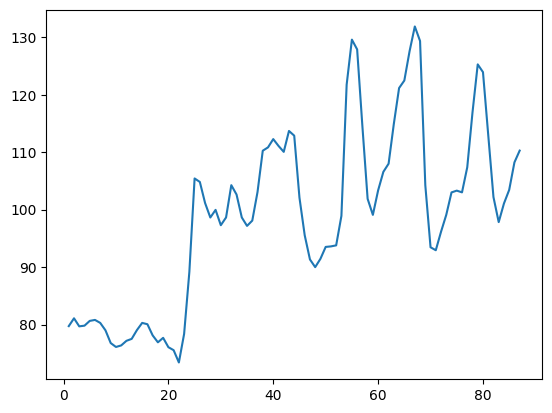

In [12]:
plt.plot(datas,precos[:,0])

In [13]:
Moscow = precos[:,0]
Kaliningrad = precos[:,1]
Petersburg = precos[:,2]
Krasnodar = precos[:,3]
Ekaterinburg = precos[:,4]

In [14]:
Moscow

array([ 79.72,  81.08,  79.68,  79.8 ,  80.63,  80.8 ,  80.28,  78.99,
        76.77,  76.09,  76.36,  77.16,  77.5 ,  79.03,  80.28,  80.05,
        78.11,  76.9 ,  77.68,  76.05,  75.53,  73.39,  78.36,  89.16,
       105.43, 104.82, 101.15,  98.63,  99.96,  97.29,  98.64, 104.26,
       102.63,  98.64,  97.17,  98.09, 103.07, 110.26, 110.84, 112.28,
       111.1 , 110.06, 113.7 , 112.88, 102.08,  95.54,  91.33,  89.99,
        91.44,  93.51,  93.6 ,  93.78,  98.91, 121.76, 129.6 , 127.9 ,
       114.55, 101.88,  99.09, 103.35, 106.58, 108.  , 114.95, 121.17,
       122.48, 127.58, 131.89, 129.36, 104.26,  93.45,  92.93,  96.15,
        99.1 , 103.  , 103.31, 103.01, 107.37, 116.91, 125.29, 123.94,
       113.03, 102.19,  97.83, 101.07, 103.44, 108.23, 110.28])

In [17]:
Moscow.shape

(87,)

In [18]:
Moscow_ano1 = Moscow[0:12]
Moscow_ano2 = Moscow[12:24]
Moscow_ano3 = Moscow[24:36]
Moscow_ano4 = Moscow[36:48]

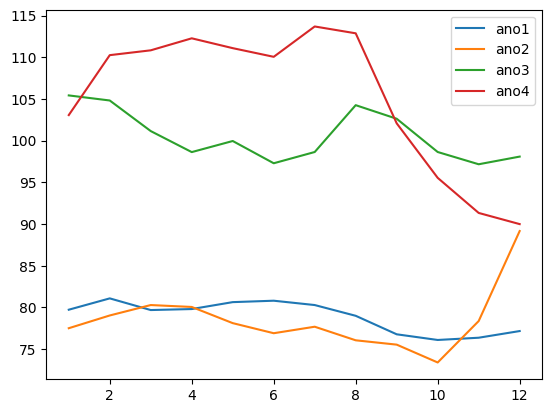

In [19]:
plt.plot(np.arange(1,13,1), Moscow_ano1)
plt.plot(np.arange(1,13,1), Moscow_ano2)
plt.plot(np.arange(1,13,1), Moscow_ano3)
plt.plot(np.arange(1,13,1), Moscow_ano4)
plt.legend(['ano1', 'ano2', 'ano3', 'ano4'])

corrigindo o valor que está como NaN na tabela da cidade de Kaliningrad

In [20]:
# identificando a quantidade de valores que estão como NaN
sum(np.isnan(Kaliningrad))

np.int64(1)

In [21]:
# cobrindo o valor NaN com uma interpoalção dos valores vizinhos a ele
Kaliningrad[4] = np.mean([Kaliningrad[3],Kaliningrad[5]])

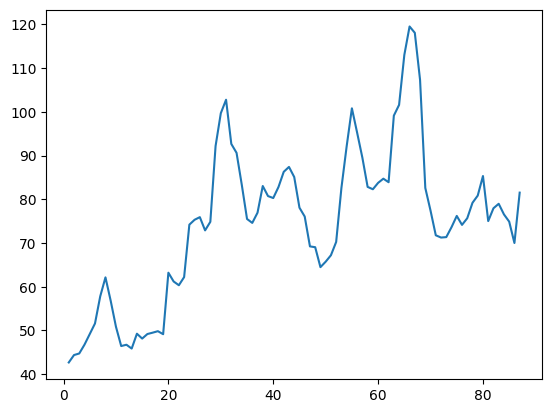

In [ ]:
# plotando as vendas de maçã de kalinigrad em função do tempo (ao longo dos 87 meses descritos nos dados)
plt.plot(datas, Kaliningrad)

O coefiente angular pode ser obtido usando a equação:

$$ \hat{a} = \frac{n*Soma( X_i*Y_i ) - Soma( X_i )*Soma(Y_i)}{n Soma(X_i^2) - (Soma(X_i))^2}$$

In [23]:
# achando o coeficiente angular do ajuste y = a*X + b
Y = Moscow
X = datas
n = np.size(Moscow)

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - np.sum(X)**2)

O valor de b pode ser otido pela equação:

$$ \hat{b} = Média(Y_i) - \hat{a}*Média(X_i)$$

In [24]:
# achando o valor de b do ajuste y = a*X + b
b = np.mean(Y) - a*np.mean(X)

In [ ]:
# ajuste y = a*X + b
y = a*X+b

array([ 80.08412487,  80.51932699,  80.95452911,  81.38973123,
        81.82493336,  82.26013548,  82.6953376 ,  83.13053972,
        83.56574184,  84.00094396,  84.43614608,  84.87134821,
        85.30655033,  85.74175245,  86.17695457,  86.61215669,
        87.04735881,  87.48256093,  87.91776306,  88.35296518,
        88.7881673 ,  89.22336942,  89.65857154,  90.09377366,
        90.52897578,  90.96417791,  91.39938003,  91.83458215,
        92.26978427,  92.70498639,  93.14018851,  93.57539063,
        94.01059276,  94.44579488,  94.880997  ,  95.31619912,
        95.75140124,  96.18660336,  96.62180548,  97.05700761,
        97.49220973,  97.92741185,  98.36261397,  98.79781609,
        99.23301821,  99.66822033, 100.10342246, 100.53862458,
       100.9738267 , 101.40902882, 101.84423094, 102.27943306,
       102.71463519, 103.14983731, 103.58503943, 104.02024155,
       104.45544367, 104.89064579, 105.32584791, 105.76105004,
       106.19625216, 106.63145428, 107.0666564 , 107.50

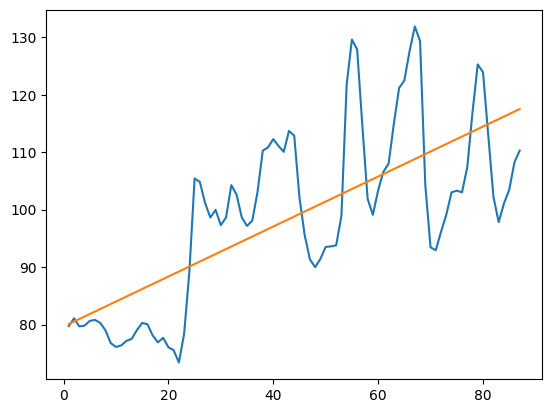

In [ ]:
#aplicação do ajuste nos dados da venda de maçã em Moscou
plt.plot(datas,Moscow)
plt.plot(X,y)

plotar um círculo

C:\Users\thiag\AppData\Local\Temp\ipykernel_12972\2708881471.py:8: RuntimeWarning: invalid value encountered in sqrt
  y1 = np.sqrt(1 - x**2)
C:\Users\thiag\AppData\Local\Temp\ipykernel_12972\2708881471.py:9: RuntimeWarning: invalid value encountered in sqrt
  y2 = -np.sqrt(1 - x**2)


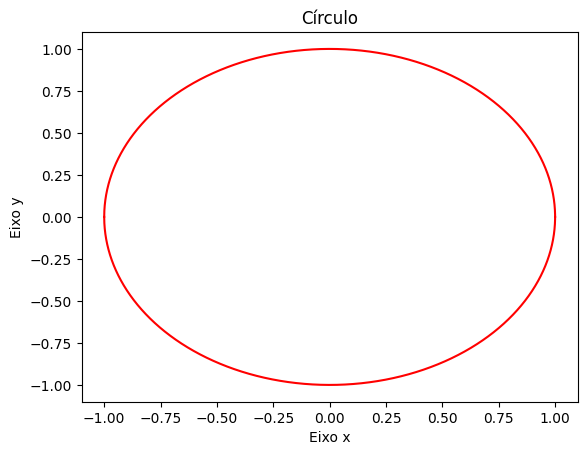

In [33]:
# import numpy as np
# import matplotlib.pyplot as plt

# Gerar uma sequência de valores de x de -1 a 1
x = np.arange(-1, 1.01, 0.0001)

# Implementação da fórmula
y1 = np.sqrt(1 - x**2)
y2 = -np.sqrt(1 - x**2)

# Plotar o gráfico com as duas partes do círculo
plt.plot(x, y1, 'r')
plt.plot(x, y2, 'r' )

# Adicionar o título do gráfico e os rótulos dos eixos x e y
plt.title("Círculo")
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")

# Exibir o gráfico
plt.show()

Estimativa de crescimento do preço da maçã em Moscou utilizando o ajuste obtido acima:

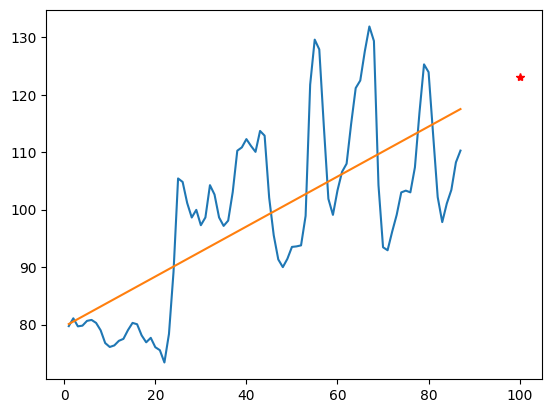

In [35]:
plt.plot(datas,Moscow)
plt.plot(X,y)
plt.plot(41.5,41.5*a+b)
plt.plot(100,100*a+b,'*r')

In [ ]:
x = [0,1,2,3,4,5,6,7,8,9,10]
y = []

for i in x:
  y.append(i + 3 / 2)

In [37]:
print(y)

[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]


Utilização do array Numpy para armazenar os valores de x e, em seguida, aplicar a operação diretamente no array, o que é muito mais eficiente do que utilizar um loop for, como no exemplo abaixo:

In [38]:
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = x + 3 / 2

print(y)

[ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5]


## Referências para estudar

A regressão é muito utilizada em ciência de dados para a previsão e também a interpolação de valores. Seu uso tem diversos aspectos e eu separei alguns cursos da Alura que você pode fazer para se aprofundar no assunto.

Curso Online Data Analysis: previsões com Google Sheets | Alura

Curso Online Regressão linear: testando relações e prevendo resultados | Alura

Curso Online Regressão Linear: técnicas avançadas de modelagem | Alura

Curso Online Estatística com Python: Correlação e Regressão | Alura

## Resumo do curso 

Neste curso, utilizamos biblioteca NumPy para abrir o arquivo de preços de maçãs que estava formato CSV. Para isso, aprendemos a função loadtxt().

Conseguimos gerar uma sequência de número através de np.arrange() e utilizamos a Matplotlib para visualizar os dados. Antes de utilizá-la, porém, tivemos que moldar os dados e realizar uma operação de transposição, tornando-os mais coerentes para análise. Além disso, aprendemos a analisar as dimensões do dataset, como, por exemplo, o número de elementos e sua forma.

Gerados os gráficos, aprendemos a separar parte das informações em diferentes arrays, além de selecionar informações específicas destes arrays. Conseguimos, ainda, comparar partes de um mesmo array, verificando as informações de um único ano.

Feito isso, visualizamos os dados de Kaliningrad e notamos a presença de dado do tipo NaN. Então, aprendemos a verificar e tratar dados deste tipo. Neste caso, interpolamos os dados calculando a média entre os valores anterior e posterior à NaN.

Em seguida, começamos a trabalhar com regressão linear para podermos operar através de mais funções da NumPy. Começamos, então, a chutar valores dos coeficientes angular e linear, e da reta.

Ao mesmo tempo, utilizamos funções para calcular a diferença entre os arrays ponto a ponto, como elevar um array ao quadrado, somar todos os seus elementos ou calcular raiz quadrada através da sqrt(). Estimamos uma boa reta e vimos a função linalg.norm(), que serve para resumir o cálculo.

Aprendemos, ainda, que há uma fórmula fechada para calcularmos os coeficientes, então a implementamos utilizando as funções da NumPy.

Feito isso, precisamos de outra fórmula para conseguir estimar os coeficientes, já que nem sempre temos uma fórmula fechada para defini-los.

Para isso, utilizamos a geração de números aleatórios dentro de um intervalo que fizesse sentido para o nosso problema. Além disso, trabalhamos com o assunto de reprodutibilidade, para entendermos como gerar os mesmos números aleatórios usando uma mesma semente.

Por fim, aprendemos a agregar e salvar os dados, finalizando nosso projeto e viabilizando nossos dados para futuras análises.